# ML Week 3 Assignment 

Stan Lyubarskiy

## Instructions

Goal:

The goal of this assignment is to train various Logistic Regression models on KDDCup99 dataset. You can find more details and download the dataset here: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

Tasks:

Become familiar with Scikit-Learn’s logistic regression model.  You can find more details and examples here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Download KDD99Cup dataset (http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)
Using the Scikit-Learn Library, train the Logistic Regression model to classify Probe vs. Not Probe classes using all available features. Probe class consists of all probing attacks, such as ipsweep probe, nmap probe, portsweep probe, etc. Non probe class consists of every other attack in the dataset. Make sure you split your data into train and test sets. In general, 80% for training 20% for testing is a good split.
Summarize your results. 
What is the training accuracy? 
What is the testing accuracy? 
Do you think your model overfits? 
How many iteration did it take to converge?

Take a look at the trained model parameters. Which features have the largest weights in absolute value? These are potentially most informative features for the trained model. Do they make sense? Why?

Train model with L1 and L2 regularization. Compare the accuracies for L1 and L2 and plot the feature weights.
Try different strengths for L2 regularization. (You can use values .001, .01,.1,1,10 etc.)  Show how the train and test accuracy varies with different regularization strengths. Explain your results.
 
Carry out all the tasks on a single Jupyter notebook. Discuss your findings when appropriate.  Is what you observe expected? Why?



Notes/Hints: 
 
-        You can use label encoder or one hot encoding for encoding categorical variables.
-        The dataset given is highly imbalanced and you will need to under sample the majority class to make the dataset balanced( see https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
 -    This is a one good way of splitting dataset into train and test:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
-        List of all attacks in the dataset is here: 
 
back dos
buffer_overflow u2r

ftp_write r2l

guess_passwd r2l

imap r2l

ipsweep probe

land dos

loadmodule u2r

multihop r2l

neptune dos

nmap probe

perl u2r

phf r2l

pod dos

portsweep probe

rootkit u2r

satan probe

smurf dos

spy r2l

teardrop dos

warezclient r2l

warezmaster r2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
#import the file as a df and the column headers from the names file

df = pd.read_csv("kddcup.data.gz", header=None, names=["duration","protocol_type","service","flag","src_bytes","dst_bytes",
                                                      "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
                                                      "num_compromised","root_shell","su_attempted","num_root",
                                                      "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
                                                      "is_host_login","is_guest_login","count","srv_count","serror_rate",
                                                      "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
                                                      "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
                                                      "dst_host_same_srv_rate","dst_host_diff_srv_rate",
                                                      "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
                                                      "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
                                                      "dst_host_srv_rerror_rate","attacks"])

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attacks
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
#check to see if all the data was loaded
df.shape

(4898431, 42)

In [5]:
#check what is in the last column
df.iloc[:,41].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [3]:
df["attacks"].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: attacks, dtype: int64

In [6]:
#check to see if the columns were successfully renamed
print(df.columns, df.dtypes)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attacks'],
      dtype='object') duration                         int64
protocol_type                   object
service                         object
flag                          

In [7]:
#view the counts of the different attacks
print(df["attacks"].value_counts())
print(df["attacks"].unique())

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: attacks, dtype: int64
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [8]:
#filter all rows where the attack = normal because we only want attack data in our dataset
df2 = df[df["attacks"] != "normal."]

In [9]:
#check if normal was filtered out
df2["attacks"].unique()

array(['buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.',
       'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.',
       'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.', 'nmap.',
       'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'],
      dtype=object)

In [10]:
# assign my y and X
# probing attacks are "ipsweep.", "nmap.", "pod.", "satan."
import numpy as np
y = df2.iloc[:, -1].values
y = np.where((y == "ipsweep.") | (y == "nmap.") | (y == "portsweep.") | (y =="satan."), 1, 0)

X = df2.iloc[:,0:41]

In [11]:
# use pd.get_dummies to one hot encode all of X before splitting so the columns are the same

X = pd.get_dummies(X, prefix="enc")
print(X.columns, X.shape)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'enc_REJ', 'enc_RSTO', 'enc_RSTOS0', 'enc_RSTR', 'enc_S0', 'enc_S1',
       'enc_S2', 'enc_S3', 'enc_SF', 'enc_SH'],
      dtype='object', length=118) (3925650, 118)


### Considerations

I originally tried to use the OneHotEncoder to to encode the X_train and X_test data after splitting. However, this process crashed my kernel repeatedly and dropped my feature names. It also encoded my continuous variables which it should not have done. To simplify the process, I used get_dummies to encode only the categorical columns and to retain the feature names which I could map to my coefficients later.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split the data into an 80/20 training/testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# check to see if the split datasets have the same number of columns
print("X_Train:", X_train.shape, "X_Test:", X_test.shape, "y_train:", y_train.shape, "y_test",y_test.shape)

X_Train: (3140520, 118) X_Test: (785130, 118) y_train: (3140520,) y_test (785130,)


In [15]:
# check that the column names match and save the feature names for later
print(X_train.columns == X_test.columns)
feature_names = X_train.columns
print(feature_names)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'enc_REJ', 'enc_RSTO', 'enc_RSTOS0', 'enc_RSTR', 'enc_S0', 'enc_S1',
       'enc_S2', 'enc_S3', 'enc_SF', 'enc_SH']

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# find features with a large variance so they can be scaled
pd.options.display.float_format = '{:.5f}'.format
df2.var()
# duration, src_bytes, dst_bytes, count, srv_count, dst_host_count, and dst_host_srv_count all have a very large varaince

C:\Users\stanl\AppData\Local\Temp\ipykernel_15168\2909782520.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.var()


duration                             191056.47467
src_bytes                     1102891135311.36694
dst_bytes                      518844604428.32178
land                                      0.00001
wrong_fragment                            0.00229
urgent                                    0.00000
hot                                       0.05881
num_failed_logins                         0.00002
logged_in                                 0.00086
num_compromised                           0.00116
root_shell                                0.00001
su_attempted                              0.00000
num_root                                  0.00128
num_file_creations                        0.00023
num_shells                                0.00000
num_access_files                          0.00000
num_outbound_cmds                         0.00000
is_host_login                             0.00000
is_guest_login                            0.00008
count                                 22972.56091


In [18]:
# standardize the columns with a large variance
# duration, src_bytes, dst_bytes, count, srv_count, dst_host_count, and dst_host_srv_count all have a very large varaince

std_features = ["duration", "src_bytes", "dst_bytes", "count", "srv_count", "dst_host_count", "dst_host_srv_count"]

mms = MinMaxScaler()

X_train_mms = X_train.loc[:, std_features].values

X_train.loc[:, std_features] = mms.fit_transform(X_train_mms)
X_test.loc[:, std_features] = mms.transform(X_test.loc[:, std_features].values)

In [19]:
# check the data
print(X_train.shape, X_test.shape)

(3140520, 118) (785130, 118)


In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [21]:
#undersample the data
X_res, y_res = rus.fit_resample(X_train,y_train)

In [22]:
print("Size of X:",X_res.shape, "Size of Y:", y_res.shape)

Size of X: (65754, 118) Size of Y: (65754,)


# Logistic Regression

In [23]:
from sklearn.metrics import accuracy_score

## Testing Using lbfgs

In [24]:
# Create a Logistic Regression instance using the lbfgs solver
# Lbfgs only supports L2 penalties
lbfgs1 = LogisticRegression(penalty='l2',C=1.0,random_state=42,solver='lbfgs',max_iter=100)

In [25]:
# Fit the training data
lbfgs1.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [26]:
# Get predictions
y_hat1 = lbfgs1.predict(X_test)

In [27]:
# Calculate accuracy on training and testing data
print("Training Accuracy:", lbfgs1.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(y_hat1, y_test)*100),"%")
print("Number of Iterations:", lbfgs1.n_iter_[0])

Training Accuracy: 99.97414605955531 %
Testing Accuracy: 99.96854024174341 %
Number of Iterations: 78


In [28]:
lbfgs1.coef_.shape

(1, 118)

In [29]:
# Create a dataframe that maps the feature names to the coefficients
lbfgs1_coef = pd.DataFrame(data=abs(lbfgs1.coef_),columns=feature_names)

In [30]:
# Transpose the DF to make it easier to read
lbfgs1_coef = lbfgs1_coef.T
lbfgs1_coef.rename(columns={0:"Features"},inplace=True)

In [31]:
# Find the top features by coefficient values
top_coef1 = lbfgs1_coef.sort_values(by="Features",ascending=False).head(10)
top_coef1

,Features
diff_srv_rate,7.02223
dst_host_diff_srv_rate,6.65695
dst_host_serror_rate,5.75887
dst_host_same_src_port_rate,4.84351
srv_count,4.11284
enc_ecr_i,3.73231
count,3.67015
dst_host_rerror_rate,3.38630
wrong_fragment,3.30761
dst_host_same_srv_rate,3.07899


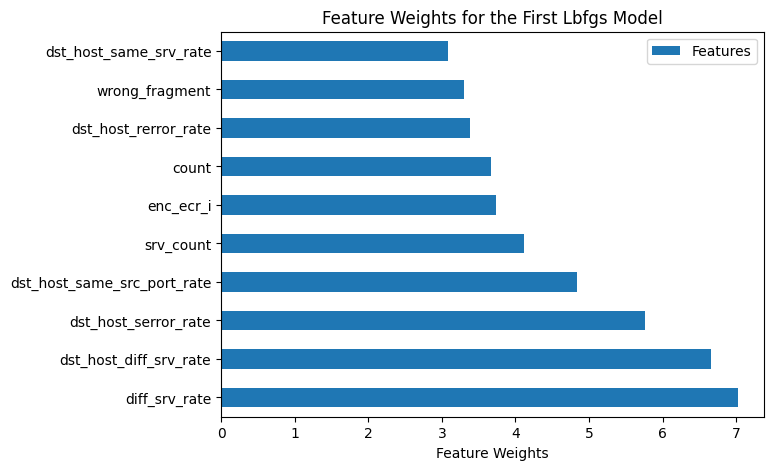

In [32]:
# Plot the feature weights
top_coef1.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the First Lbfgs Model")
plt.show()

In [33]:
#Let us try adjusting the regulatization strength to see how it affects the results (C=0.001)
lbfgs2 = LogisticRegression(penalty='l2',C=0.001,random_state=42,solver='lbfgs',max_iter=100)

lbfgs2.fit(X_res, y_res)

y_hat2 = lbfgs2.predict(X_test)

print("Training Accuracy:", lbfgs2.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(y_hat2, y_test)*100),"%")
print("Number of Iterations:", lbfgs2.n_iter_[0])

Training Accuracy: 97.12717097058734 %
Testing Accuracy: 94.7994599620445 %
Number of Iterations: 21


In [34]:
#Let us try adjusting the regulatization strength to see how it affects the results (C=0.01)
lbfgs3 = LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='lbfgs',max_iter=100)

lbfgs3.fit(X_res, y_res)

y_hat3 = lbfgs3.predict(X_test)

print("Training Accuracy:", lbfgs3.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(y_hat3, y_test)*100),"%")
print("Number of Iterations:", lbfgs3.n_iter_[0])

Training Accuracy: 99.79925175654712 %
Testing Accuracy: 99.92727319042707 %
Number of Iterations: 36


In [35]:
#Let us try adjusting the regulatization strength to see how it affects the results (C=0.1)
lbfgs4 = LogisticRegression(penalty='l2',C=0.1,random_state=42,solver='lbfgs',max_iter=100)

lbfgs4.fit(X_res, y_res)

y_hat4 = lbfgs4.predict(X_test)

print("Training Accuracy:", lbfgs4.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(y_hat4, y_test)*100),"%")
print("Number of Iterations:", lbfgs4.n_iter_[0])

Training Accuracy: 99.95589621924141 %
Testing Accuracy: 99.95236457656695 %
Number of Iterations: 45


In [36]:
#Let us try adjusting the regulatization strength to see how it affects the results (C=10)
lbfgs5 = LogisticRegression(penalty='l2',C=10,random_state=42,solver='lbfgs',max_iter=130)

lbfgs5.fit(X_res, y_res)

y_hat5 = lbfgs5.predict(X_test)

print("Training Accuracy:", lbfgs5.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(y_hat5, y_test)*100),"%")
print("Number of Iterations:", lbfgs5.n_iter_[0])

Training Accuracy: 99.99391671989537 %
Testing Accuracy: 99.99248532090228 %
Number of Iterations: 115


In [37]:
# Coeff for C=0.001
lbfgs2_coef = pd.DataFrame(data=abs(lbfgs2.coef_),columns=feature_names)
lbfgs2_coef = lbfgs2_coef.T
lbfgs2_coef.rename(columns={0:"Features"},inplace=True)
top_coef2 = lbfgs2_coef.sort_values(by="Features",ascending=False).head(10)

# Coeff for C=0.01
lbfgs3_coef = pd.DataFrame(data=abs(lbfgs3.coef_),columns=feature_names)
lbfgs3_coef = lbfgs3_coef.T
lbfgs3_coef.rename(columns={0:"Features"},inplace=True)
top_coef3 = lbfgs3_coef.sort_values(by="Features",ascending=False).head(10)

# Coeff for C=0.1
lbfgs4_coef = pd.DataFrame(data=abs(lbfgs4.coef_),columns=feature_names)
lbfgs4_coef = lbfgs4_coef.T
lbfgs4_coef.rename(columns={0:"Features"},inplace=True)
top_coef4 = lbfgs4_coef.sort_values(by="Features",ascending=False).head(10)

# Coeff for C=10
lbfgs5_coef = pd.DataFrame(data=abs(lbfgs5.coef_),columns=feature_names)
lbfgs5_coef = lbfgs5_coef.T
lbfgs5_coef.rename(columns={0:"Features"},inplace=True)
top_coef5 = lbfgs5_coef.sort_values(by="Features",ascending=False).head(10)

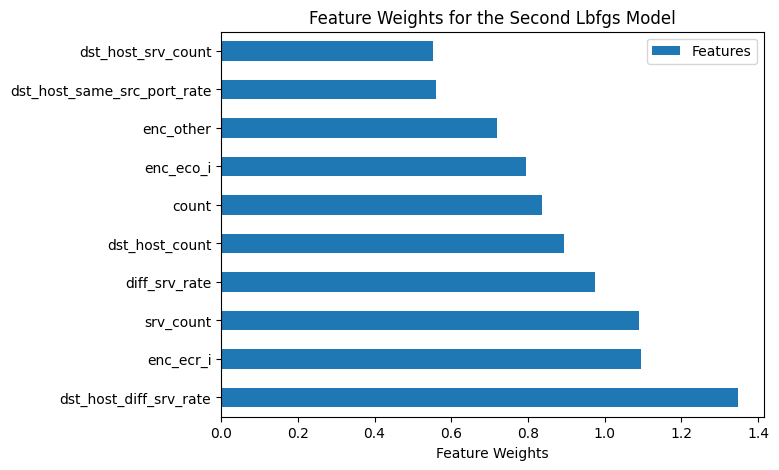

In [38]:
# Plot the feature weights for the second model
top_coef2.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the Second Lbfgs Model")
plt.show()

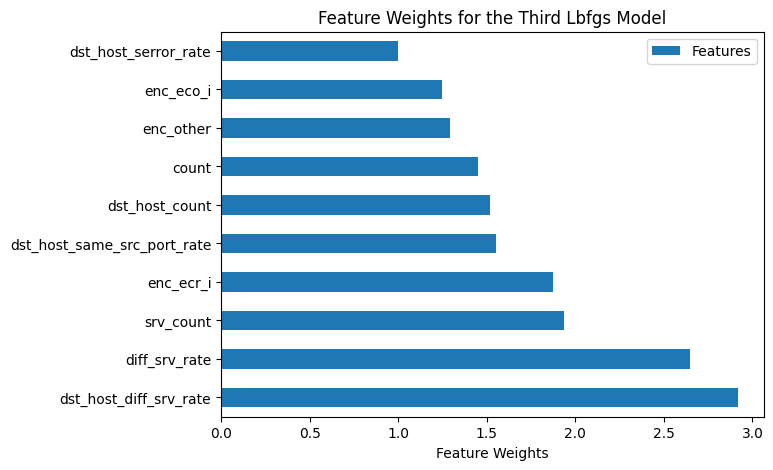

In [39]:
# Plot the feature weights for the third model
top_coef3.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the Third Lbfgs Model")
plt.show()

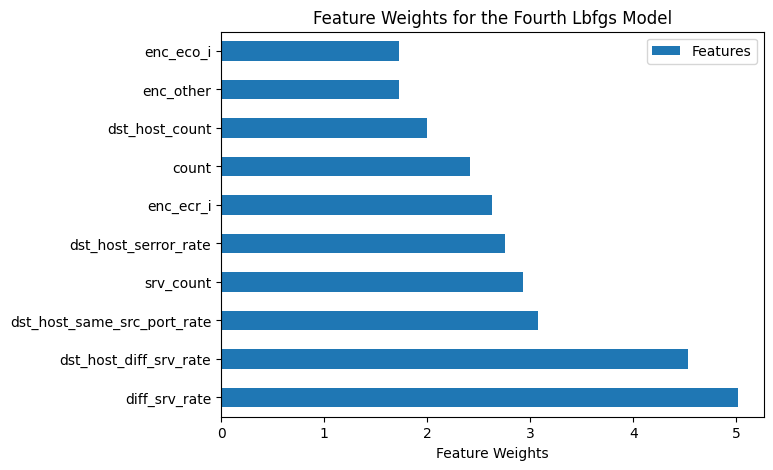

In [40]:
# Plot the feature weights for the fourth model
top_coef4.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the Fourth Lbfgs Model")
plt.show()

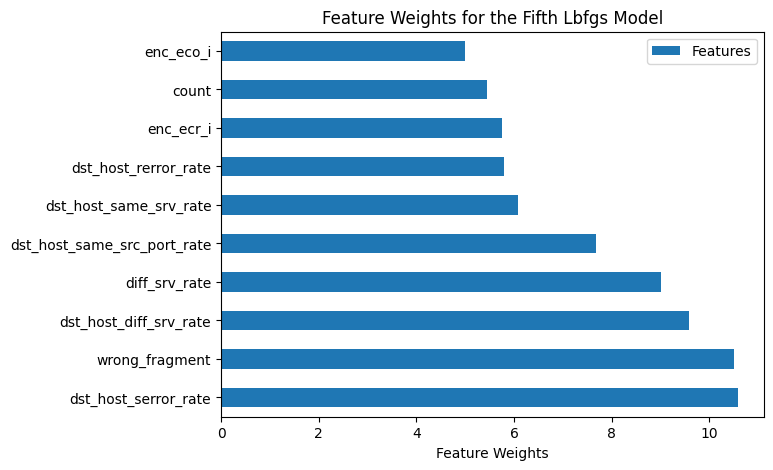

In [41]:
# Plot the feature weights for the fifth model
top_coef5.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the Fifth Lbfgs Model")
plt.show()

### Observation

For the lbfgs solver, the training and testing accuracy was approximately 99.96% for the first model where the regularization strength was set 1 (the default). From there, the accuracy for both tended to trend upwards from a low where C was equal to 0.001 to a high when C was 10. Interestingly, when C was equal to 0.01, the testing accuracy was actually higher than the training accuracy.

The model does not appear to be overfitting because the training accuracy and the testing accuracy are close together with the training being slightly higher. An overfit model would have significantly higher training accuracy than the testing accuracy. This would imply that the model is not learning how to generalize on new data. 

The model was only training with L2 regularization because lbfgs does not support L1 regularization. As I changed the regularization strength (the C parameter), the number of iterations and the accuracy also changed. As the C value increased by a factor of 10, the number of iterations also increased while there were marginal increases in both the training and testing accuracy. The iterations ranged from a low of 21 (C = 0.001) to a high of 115 (C = 10).

The top ten features by coefficients or feature weights changed depending on the regularization strength. Looking at the final model with C set to 10, we see that the percentage of SYN errors and the number of connections to different services have the highest feature weights. This makes sense because SYN Scans are some of the most popular probing attacks which often result in SYN errors or reset messages. These information-gathering scans are run on many ports and can open multiple connections to identify substantial information from the host which can be used for later attacks.

## Testing Using Newton-cg

In [42]:
# Switch the solver to newton-cg
# (C=0.001)
ncg1 = LogisticRegression(penalty='l2',C=0.001,random_state=42,solver='newton-cg',max_iter=100)

ncg1.fit(X_res, y_res)

ncg1_pred = ncg1.predict(X_test)

print("Training Accuracy:", ncg1.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(ncg1_pred, y_test)*100),"%")
print("Number of Iterations:", ncg1.n_iter_[0])

Training Accuracy: 97.12717097058734 %
Testing Accuracy: 94.7994599620445 %
Number of Iterations: 18


In [43]:
# (C=0.01)
ncg2 = LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='newton-cg',max_iter=100)

ncg2.fit(X_res, y_res)

ncg2_pred = ncg2.predict(X_test)

print("Training Accuracy:", ncg2.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(ncg2_pred, y_test)*100),"%")
print("Number of Iterations:", ncg2.n_iter_[0])

Training Accuracy: 99.79925175654712 %
Testing Accuracy: 99.92727319042707 %
Number of Iterations: 16


In [44]:
# (C=0.1)
ncg3 = LogisticRegression(penalty='l2',C=0.1,random_state=42,solver='newton-cg',max_iter=100)

ncg3.fit(X_res, y_res)

ncg3_pred = ncg3.predict(X_test)

print("Training Accuracy:", ncg3.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(ncg3_pred, y_test)*100),"%")
print("Number of Iterations:", ncg3.n_iter_[0])

Training Accuracy: 99.95589621924141 %
Testing Accuracy: 99.95236457656695 %
Number of Iterations: 18


In [45]:
# (C=1)
ncg4 = LogisticRegression(penalty='l2',C=1,random_state=42,solver='newton-cg',max_iter=100)

ncg4.fit(X_res, y_res)

ncg4_pred = ncg4.predict(X_test)

print("Training Accuracy:", ncg4.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(ncg4_pred, y_test)*100),"%")
print("Number of Iterations:", ncg4.n_iter_[0])

Training Accuracy: 99.97414605955531 %
Testing Accuracy: 99.96854024174341 %
Number of Iterations: 19


In [46]:
# (C=10)
ncg5 = LogisticRegression(penalty='l2',C=10,random_state=42,solver='newton-cg',max_iter=100)

ncg5.fit(X_res, y_res)

ncg5_pred = ncg5.predict(X_test)

print("Training Accuracy:", ncg5.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(ncg5_pred, y_test)*100),"%")
print("Number of Iterations:", ncg5.n_iter_[0])

Training Accuracy: 99.99391671989537 %
Testing Accuracy: 99.99248532090228 %
Number of Iterations: 22


### Observation

After switching to the solver to newton-cg, I noticed extremely fast convergence regardless of the regularization strength. The lowest convergence was 16 iterations and the highest was 22 which is incredible. Despite the low number of iterations, the accuracy is still very high. In fact, it appears identical to the accuracy of the Lbfgs solver.

In [47]:
# Given that the accuracy is basically the same, I decided to only plot the feature weights when C=10

# Coeff for C=10
ncg5_coef = pd.DataFrame(data=abs(ncg5.coef_),columns=feature_names)
ncg5_coef = ncg5_coef.T
ncg5_coef.rename(columns={0:"Features"},inplace=True)
top_ncg5 = ncg5_coef.sort_values(by="Features",ascending=False).head(10)
top_ncg5

,Features
dst_host_serror_rate,10.58076
wrong_fragment,10.50462
dst_host_diff_srv_rate,9.58407
diff_srv_rate,9.01070
dst_host_same_src_port_rate,7.68044
dst_host_same_srv_rate,6.07324
dst_host_rerror_rate,5.79820
enc_ecr_i,5.74734
count,5.44701
enc_eco_i,5.00330


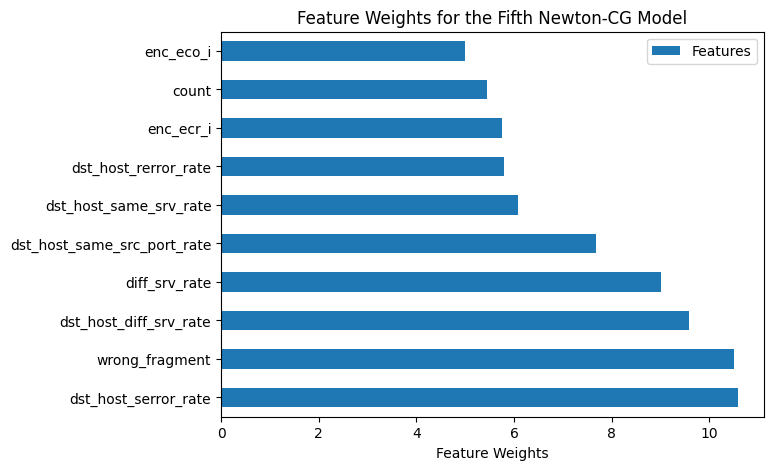

In [48]:
# Plot the feature weights for the fifth model
top_ncg5.plot(kind="barh", figsize=(7,5))
plt.xlabel("Feature Weights")
plt.title("Feature Weights for the Fifth Newton-CG Model")
plt.show()

### Observation

As with lbfgs, we only trained the model with L2 regularization because it does not support L1 regularization. The accuracy scores and the top features look the same for newton-cg as they did for lbfgs. Therefore, our conclusions for the top features have not changed. The only difference appears to be the ability of newton-cg to converge much faster than lbfgs.

## Testing Using Liblinear

In [49]:
# Switch the solver to liblinear
# This solver supports both L1 and L2
# (C=0.001)

lib1_l1 = LogisticRegression(penalty='l1',C=0.001,random_state=42,solver='liblinear',max_iter=100)
lib1_l1.fit(X_res, y_res)
lib1_l1_pred = lib1_l1.predict(X_test)

lib1_l2 = LogisticRegression(penalty='l2',C=0.001,random_state=42,solver='liblinear',max_iter=100)
lib1_l2.fit(X_res, y_res)
lib1_l2_pred = lib1_l2.predict(X_test)

print("L1 Training Accuracy:", lib1_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(lib1_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", lib1_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", lib1_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(lib1_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", lib1_l2.n_iter_[0])

L1 Training Accuracy: 98.92782188155853 %
L1 Testing Accuracy: 99.9637002789347 %
L1 Number of Iterations: 12

L2 Training Accuracy: 97.31119019375247 %
L2 Testing Accuracy: 95.23008928457708 %
L2 Number of Iterations: 5


In [50]:
# (C=0.01)

lib2_l1 = LogisticRegression(penalty='l1',C=0.01,random_state=42,solver='liblinear',max_iter=100)
lib2_l1.fit(X_res, y_res)
lib2_l1_pred = lib2_l1.predict(X_test)

lib2_l2 = LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='liblinear',max_iter=100)
lib2_l2.fit(X_res, y_res)
lib2_l2_pred = lib2_l2.predict(X_test)

print("L1 Training Accuracy:", lib2_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(lib2_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", lib2_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", lib2_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(lib2_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", lib2_l2.n_iter_[0])

L1 Training Accuracy: 99.8874593180643 %
L1 Testing Accuracy: 99.91389960898195 %
L1 Number of Iterations: 14

L2 Training Accuracy: 99.7962101164948 %
L2 Testing Accuracy: 99.92880159973507 %
L2 Number of Iterations: 6


In [51]:
# (C=0.1)

lib3_l1 = LogisticRegression(penalty='l1',C=0.1,random_state=42,solver='liblinear',max_iter=100)
lib3_l1.fit(X_res, y_res)
lib3_l1_pred = lib3_l1.predict(X_test)

lib3_l2 = LogisticRegression(penalty='l2',C=0.1,random_state=42,solver='liblinear',max_iter=100)
lib3_l2.fit(X_res, y_res)
lib3_l2_pred = lib3_l2.predict(X_test)

print("L1 Training Accuracy:", lib3_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(lib3_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", lib3_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", lib3_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(lib3_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", lib3_l2.n_iter_[0])

L1 Training Accuracy: 99.9528545791891 %
L1 Testing Accuracy: 99.94434042769987 %
L1 Number of Iterations: 13

L2 Training Accuracy: 99.95741703926757 %
L2 Testing Accuracy: 99.95351088354795 %
L2 Number of Iterations: 8


In [52]:
# (C=1)

lib4_l1 = LogisticRegression(penalty='l1',C=1,random_state=42,solver='liblinear',max_iter=100)
lib4_l1.fit(X_res, y_res)
lib4_l1_pred = lib4_l1.predict(X_test)

lib4_l2 = LogisticRegression(penalty='l2',C=1,random_state=42,solver='liblinear',max_iter=100)
lib4_l2.fit(X_res, y_res)
lib4_l2_pred = lib4_l2.predict(X_test)

print("L1 Training Accuracy:", lib4_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(lib4_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", lib4_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", lib4_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(lib4_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", lib4_l2.n_iter_[0])

L1 Training Accuracy: 99.97870851963378 %
L1 Testing Accuracy: 99.97325283710978 %
L1 Number of Iterations: 14

L2 Training Accuracy: 99.96806277945069 %
L2 Testing Accuracy: 99.96904971151275 %
L2 Number of Iterations: 9


In [53]:
# (C=10)

lib5_l1 = LogisticRegression(penalty='l1',C=10,random_state=42,solver='liblinear',max_iter=100)
lib5_l1.fit(X_res, y_res)
lib5_l1_pred = lib5_l1.predict(X_test)

lib5_l2 = LogisticRegression(penalty='l2',C=10,random_state=42,solver='liblinear',max_iter=100)
lib5_l2.fit(X_res, y_res)
lib5_l2_pred = lib5_l2.predict(X_test)

print("L1 Training Accuracy:", lib5_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(lib5_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", lib5_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", lib5_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(lib5_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", lib5_l2.n_iter_[0])

L1 Training Accuracy: 99.99695835994768 %
L1 Testing Accuracy: 99.99579687440297 %
L1 Number of Iterations: 13

L2 Training Accuracy: 99.99239589986921 %
L2 Testing Accuracy: 99.99006533949792 %
L2 Number of Iterations: 11


### Observation

Liblinear is different from the other two solvers that we have seen. It supports both L1 and L2 penalties which allows us to compare the effect of signal strength not just within penalties but across different ones as well. Similar to newton-cg, liblibear has very fast convergence. L2 regularization ranged from a low of five iterations to a high of 11. For L1, the low was 12 and the high was 14 iterations.

The model does not appear to overfit as the training and testing accuracy are close together. In the cases where C was 0.001 and 0.01, the testing accuracy was actually higher than the training accuracy. Overall, the training accuracy was higher than the testing accuracy in almost all cases. This is expected if the model was fitted properly.

Generally, the L1 penalty models outperformed the L2 models in accuracy except when the regularization strength was 0.1 and 0.01. Both L1 and L2 had the highest accuracy when the regularization strength was increased to 10. The L2 scores were almost identical to the Newton-cg and Lbfgs models.

In [54]:
# put the features in a df

lib1_l1_coef = pd.DataFrame(data=abs(lib1_l1.coef_),columns=feature_names)
lib1_l1_coef = lib1_l1_coef.T
lib1_l1_coef.rename(columns={0:"Features"},inplace=True)
top_lib1_l1 = lib1_l1_coef.sort_values(by="Features",ascending=False).head(10)

lib1_l2_coef = pd.DataFrame(data=abs(lib1_l2.coef_),columns=feature_names)
lib1_l2_coef = lib1_l2_coef.T
lib1_l2_coef.rename(columns={0:"Features"},inplace=True)
top_lib1_l2 = lib1_l2_coef.sort_values(by="Features",ascending=False).head(10)

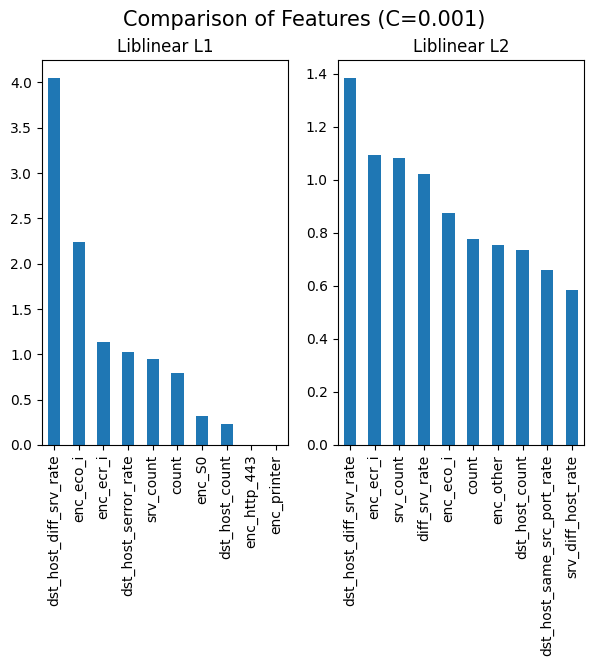

In [55]:
# compare liblinear feature weights for L1 vs L2 with C = 0.001

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Comparison of Features (C=0.001)', fontsize =15)


top_lib1_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Liblinear L1", legend=False)
top_lib1_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Liblinear L2", legend=False)

plt.show()

### Observation

Plotting the liblinear feature weights with L1 and L2 regularization and C equal to 0.001 makes it easier to see why L1 has a higher accuracy score. Even though there is overlap between the top features, L1 assigned much higher weights to them. This results in those features being more influential in the model when compared to L2. 

In [56]:
# coeff dfs for C=0.01
lib2_l1_coef = pd.DataFrame(data=abs(lib2_l1.coef_),columns=feature_names)
lib2_l1_coef = lib2_l1_coef.T
lib2_l1_coef.rename(columns={0:"Features"},inplace=True)
top_lib2_l1 = lib2_l1_coef.sort_values(by="Features",ascending=False).head(10)

lib2_l2_coef = pd.DataFrame(data=abs(lib2_l2.coef_),columns=feature_names)
lib2_l2_coef = lib2_l2_coef.T
lib2_l2_coef.rename(columns={0:"Features"},inplace=True)
top_lib2_l2 = lib2_l2_coef.sort_values(by="Features",ascending=False).head(10)

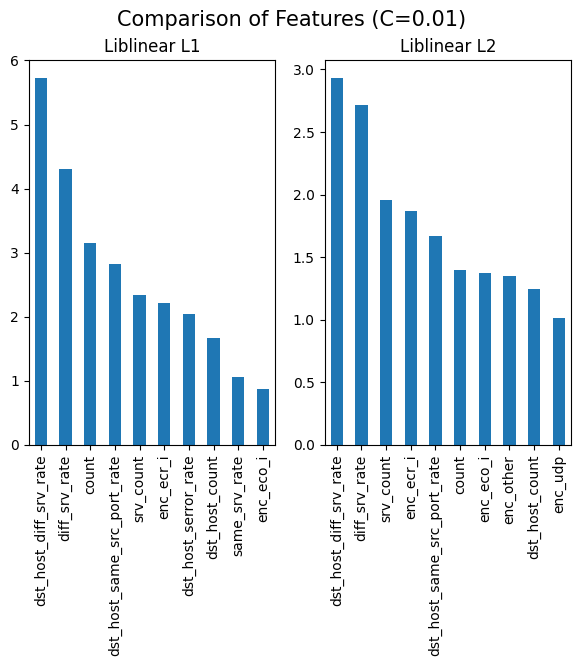

In [57]:
# compare liblinear feature weights for L1 vs L2 with C = 0.01

fig2, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig2.suptitle('Comparison of Features (C=0.01)', fontsize =15)


top_lib2_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Liblinear L1", legend=False)
top_lib2_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Liblinear L2", legend=False)

plt.show()

### Observation

With the second test, we change the regularization strength to 0.01. We see overlap between the top features again but this time the feature weights also appear closer in value. This makes sense as both of the models have a higher accuracy score than before. Therefore, we would expect some parity between the top features and their weights.

In [58]:
# coeff dfs for C=0.1
lib3_l1_coef = pd.DataFrame(data=abs(lib3_l1.coef_),columns=feature_names)
lib3_l1_coef = lib3_l1_coef.T
lib3_l1_coef.rename(columns={0:"Features"},inplace=True)
top_lib3_l1 = lib3_l1_coef.sort_values(by="Features",ascending=False).head(10)

lib3_l2_coef = pd.DataFrame(data=abs(lib3_l2.coef_),columns=feature_names)
lib3_l2_coef = lib3_l2_coef.T
lib3_l2_coef.rename(columns={0:"Features"},inplace=True)
top_lib3_l2 = lib3_l2_coef.sort_values(by="Features",ascending=False).head(10)

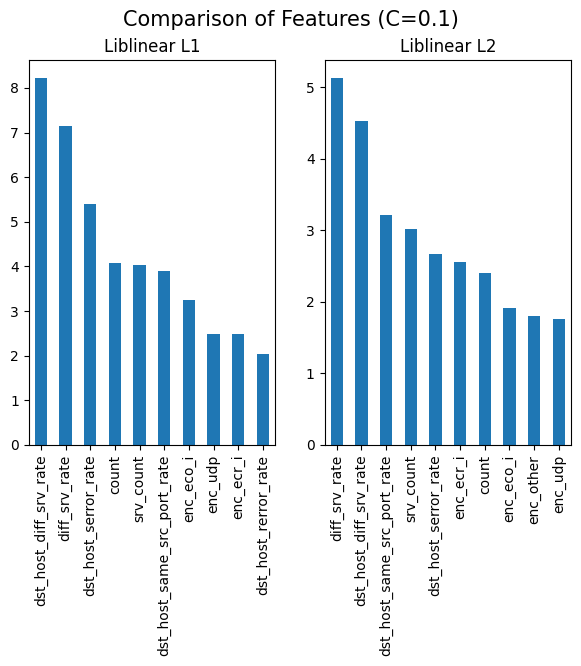

In [59]:
# compare liblinear feature weights for L1 vs L2 with C = 0.1

fig3, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig3.suptitle('Comparison of Features (C=0.1)', fontsize =15)


top_lib3_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Liblinear L1", legend=False)
top_lib3_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Liblinear L2", legend=False)

plt.show()

### Observation

After raising the C value to 0.1, the accuracy scores continued to rise for L1 and L2. The top features are still similar between the two graphs. It is somewhat surprising that wrong fragment is not higher in the feature weights and does not appear at all in the L2 graph. It is possible for the packet's fragment size to not match for legitimate reasons but that is also a popular way for attacker to solicit information from a server.

In [60]:
# coeff dfs for C=1
lib4_l1_coef = pd.DataFrame(data=abs(lib4_l1.coef_),columns=feature_names)
lib4_l1_coef = lib4_l1_coef.T
lib4_l1_coef.rename(columns={0:"Features"},inplace=True)
top_lib4_l1 = lib4_l1_coef.sort_values(by="Features",ascending=False).head(10)

lib4_l2_coef = pd.DataFrame(data=abs(lib4_l2.coef_),columns=feature_names)
lib4_l2_coef = lib4_l2_coef.T
lib4_l2_coef.rename(columns={0:"Features"},inplace=True)
top_lib4_l2 = lib4_l2_coef.sort_values(by="Features",ascending=False).head(10)

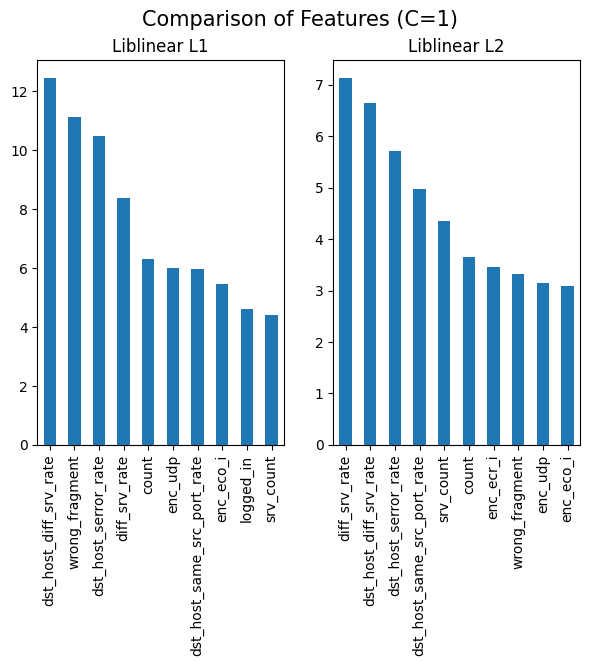

In [61]:
# compare liblinear feature weights for L1 vs L2 with C = 1

fig4, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig4.suptitle('Comparison of Features (C=1)', fontsize =15)


top_lib4_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Liblinear L1", legend=False)
top_lib4_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Liblinear L2", legend=False)

plt.show()

### Observation

I noted earlier that the accuracy of the models increases as the regularization strength increases. While the accuracy improve, the top features appear to diverge more here than they did previously. For L1, the top five features make a lot of sense. As I mentioned for a prior mode, the count of concurrent connections between the same hosts as well as connections to different services on the same host could indicate a potential probing attack. SYN errors and wrong fragment sizes are also common ways to gather intelligence about a target.

In [62]:
# coeff dfs for C=10
lib5_l1_coef = pd.DataFrame(data=abs(lib5_l1.coef_),columns=feature_names)
lib5_l1_coef = lib5_l1_coef.T
lib5_l1_coef.rename(columns={0:"Features"},inplace=True)
top_lib5_l1 = lib5_l1_coef.sort_values(by="Features",ascending=False).head(10)

lib5_l2_coef = pd.DataFrame(data=abs(lib5_l2.coef_),columns=feature_names)
lib5_l2_coef = lib5_l2_coef.T
lib5_l2_coef.rename(columns={0:"Features"},inplace=True)
top_lib5_l2 = lib5_l2_coef.sort_values(by="Features",ascending=False).head(10)

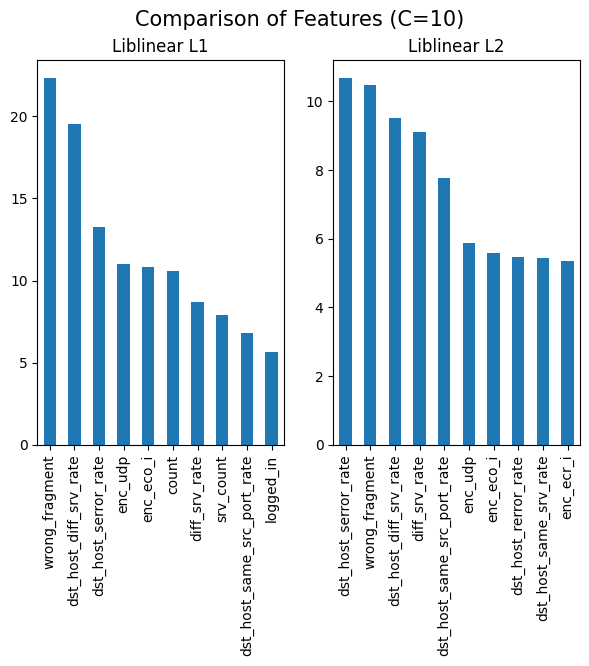

In [63]:
# compare liblinear feature weights for L1 vs L2 with C = 10

fig5, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig5.suptitle('Comparison of Features (C=10)', fontsize =15)


top_lib5_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Liblinear L1", legend=False)
top_lib5_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Liblinear L2", legend=False)

plt.show()

### Observation

Our models have hit their peak accuracy in this analysis with the regularization strength set to 10. It may continue to increase as we raise the C value but that is beyond the scope of this analysis. One of the most fascinating things is that the L2 accuracy scores seem unchanged for each model that we have tried. There is definitely a difference between L1 and L2 but liblinear is the first solver that we have analyzed that supports both.

In terms of feature weights, we see that wrong fragment has shot up near the top for both L1 and L2. I noted previously that I would expect it to be one of the more important features in the dataset. We see here that the accuracy reached its highest score as wrong fragment's weight increased. We also see the rise of udp as an important feature. This is expected as udp is traditionally the preferred protocol for attackers. Given the age of this dataset, it is likely that udp was not blocked as frequently during that time period. Many organizations now block udp as a firewall rule because of the frequency of attacks originating from that protocol.

## Testing Using Sag

In [64]:
# Switch the solver to Sag
# This solver only supports L2
# (C=0.001)

sag1 = LogisticRegression(penalty='l2',C=0.001,random_state=42,solver='sag',max_iter=100)
sag1.fit(X_res, y_res)
sag1_pred = sag1.predict(X_test)

print("Training Accuracy:", sag1.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(sag1_pred, y_test)*100),"%")
print("Number of Iterations:", sag1.n_iter_[0])

Training Accuracy: 97.12717097058734 %
Testing Accuracy: 94.7994599620445 %
Number of Iterations: 11


In [65]:
# (C=0.01)

sag2 = LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='sag',max_iter=100)
sag2.fit(X_res, y_res)
sag2_pred = sag2.predict(X_test)

print("Training Accuracy:", sag2.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(sag2_pred, y_test)*100),"%")
print("Number of Iterations:", sag2.n_iter_[0])

Training Accuracy: 99.79925175654712 %
Testing Accuracy: 99.92740055786939 %
Number of Iterations: 34


In [66]:
# (C=0.1)

sag3 = LogisticRegression(penalty='l2',C=0.1,random_state=42,solver='sag',max_iter=200)
sag3.fit(X_res, y_res)
sag3_pred = sag3.predict(X_test)

print("Training Accuracy:", sag3.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(sag3_pred, y_test)*100),"%")
print("Number of Iterations:", sag3.n_iter_[0])

Training Accuracy: 99.95741703926757 %
Testing Accuracy: 99.95261931145161 %
Number of Iterations: 176


In [67]:
# (C=1)

sag4 = LogisticRegression(penalty='l2',C=1,random_state=42,solver='sag',max_iter=1000)
sag4.fit(X_res, y_res)
sag4_pred = sag4.predict(X_test)

print("Training Accuracy:", sag4.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(sag4_pred, y_test)*100),"%")
print("Number of Iterations:", sag4.n_iter_[0])

Training Accuracy: 99.97414605955531 %
Testing Accuracy: 99.96841287430107 %
Number of Iterations: 666


In [68]:
# (C=10)

sag5 = LogisticRegression(penalty='l2',C=10,random_state=42,solver='sag',max_iter=2000)
sag5.fit(X_res, y_res)
sag5_pred = sag5.predict(X_test)

print("Training Accuracy:", sag5.score(X_res, y_res)*100,"%")
print("Testing Accuracy:", (accuracy_score(sag5_pred, y_test)*100),"%")
print("Number of Iterations:", sag5.n_iter_[0])

Training Accuracy: 99.99087507984305 %
Testing Accuracy: 99.98840956274758 %
Number of Iterations: 1382


### Observation

The sag solver only supports the L2 penalty. However, it actually differed from the previous L2 implementations that we have looked at. The number of iterations increases exponentially as the regularization strength increases. It starts with a low of 11 iterations and skyrockets to 1,382 iterations by the time we increase C to 10. This is a lot more iterations than all the other models used previously. It also took substantially longer for the code to complete running. At first glance, the accuracies appear different from the ones seen for other L2 models. We will take a closer look by graphing them side by side.


In [69]:
# coeff df for C=0.001
sag1_coef = pd.DataFrame(data=abs(sag1.coef_),columns=feature_names)
sag1_coef = sag1_coef.T
sag1_coef.rename(columns={0:"Features"},inplace=True)
top_sag1 = sag1_coef.sort_values(by="Features",ascending=False).head(10)

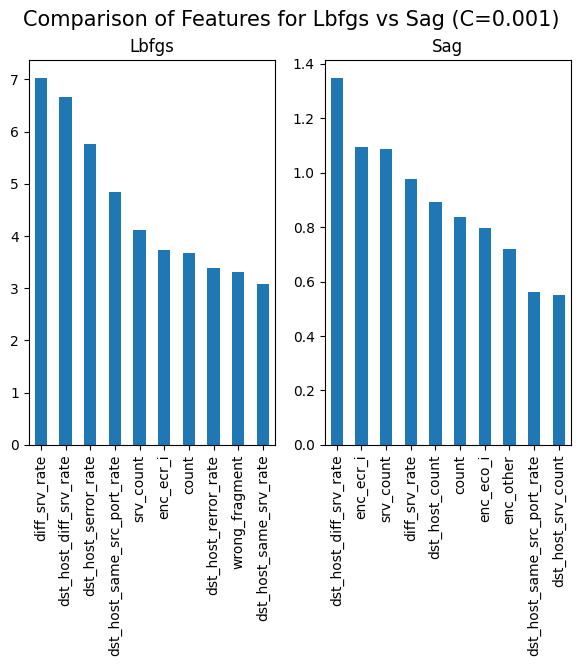

Lbfgs Test Accuracy: 99.969%
Sag Test Accuracy: 94.799%


In [70]:
# compare lbfgs feature weights vs sag with C = 0.001

fig6, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig6.suptitle('Comparison of Features for Lbfgs vs Sag (C=0.001)', fontsize=15)

top_coef1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Lbfgs", legend=False)
top_sag1.plot(ax=ax2, kind="bar", figsize=(7,5), title="Sag", legend=False)

plt.show()

print('\033[1m' + "Lbfgs Test Accuracy:" + '\033[0m', str(round(accuracy_score(y_hat1, y_test)*100,3)) + "%")
print('\033[1m' + "Sag Test Accuracy:" + '\033[0m', str(round(accuracy_score(sag1_pred, y_test)*100,3)) + "%")

### Observation

We chose Lbfgs to represent the other L2 models since the accuracy scores were constant across all L2 implementations except Sag. Putting them side by side, we can see that there is some overlap but Lbfgs places greater weights on diff_srv_rate, dst_host_diff_srv_rate, and count. The other features used by Sag do not seem as relevant in determining whether it is a probe or non-probe attack. This explains the much higher accuracy of the lbfgs model compared to the Sag model.

In [71]:
# coeff df for C=0.01
sag2_coef = pd.DataFrame(data=abs(sag2.coef_),columns=feature_names)
sag2_coef = sag2_coef.T
sag2_coef.rename(columns={0:"Features"},inplace=True)
top_sag2 = sag2_coef.sort_values(by="Features",ascending=False).head(10)

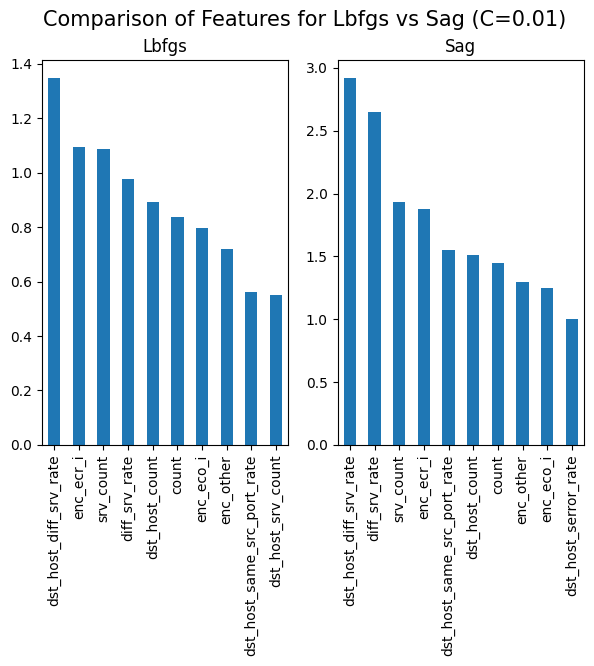

Lbfgs Test Accuracy: 94.799%
Sag Test Accuracy: 99.927%


In [72]:
# compare lbfgs feature weights vs sag with C = 0.01

fig7, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig7.suptitle('Comparison of Features for Lbfgs vs Sag (C=0.01)', fontsize=15)

top_coef2.plot(ax=ax1, kind="bar", figsize=(7,5), title="Lbfgs", legend=False)
top_sag2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Sag", legend=False)

plt.show()

print('\033[1m' + "Lbfgs Test Accuracy:" + '\033[0m', str(round(accuracy_score(y_hat2, y_test)*100,3)) + "%")
print('\033[1m' + "Sag Test Accuracy:" + '\033[0m', str(round(accuracy_score(sag2_pred, y_test)*100,3)) + "%")

### Observation

After increasing the C value to 0.01, we see almost an inverse relationship from the previous test. The sag model now has a much higher accuracy than the lbfgs model. The order of the top features for sag resemble those of lbfgs in the previous example. This makes sense. As the sag model recalibrated and adjusted the weights, it now has a much higher accuracy rate. Conversely, the lbfgs model almost adjusted the weights but now focuses on worse predictors than before.

In [73]:
# coeff df for C=0.1
sag3_coef = pd.DataFrame(data=abs(sag3.coef_),columns=feature_names)
sag3_coef = sag3_coef.T
sag3_coef.rename(columns={0:"Features"},inplace=True)
top_sag3 = sag3_coef.sort_values(by="Features",ascending=False).head(10)

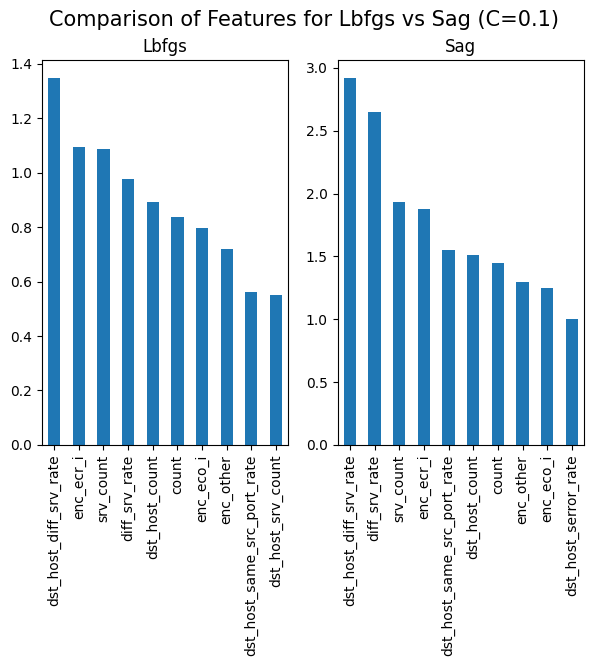

Lbfgs Test Accuracy: 99.927%
Sag Test Accuracy: 99.953%


In [74]:
# compare lbfgs feature weights vs sag with C = 0.1

fig8, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig8.suptitle('Comparison of Features for Lbfgs vs Sag (C=0.1)', fontsize=15)

top_coef2.plot(ax=ax1, kind="bar", figsize=(7,5), title="Lbfgs", legend=False)
top_sag2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Sag", legend=False)

plt.show()

print('\033[1m' + "Lbfgs Test Accuracy:" + '\033[0m', str(round(accuracy_score(y_hat3, y_test)*100,3)) + "%")
print('\033[1m' + "Sag Test Accuracy:" + '\033[0m', str(round(accuracy_score(sag3_pred, y_test)*100,3)) + "%")

### Observation

We now compare the models with regularization strength set to 0.1. The accuracy of the two models is very closer but the sag model is slightly higher. The difference in absolute weight ranges is not large. However, the top features are not the same for the two models. The top three features for sag seem like very strong predictors of a probing attack based on my security knowledge.

In [75]:
# coeff df for C=1
sag4_coef = pd.DataFrame(data=abs(sag4.coef_),columns=feature_names)
sag4_coef = sag4_coef.T
sag4_coef.rename(columns={0:"Features"},inplace=True)
top_sag4 = sag4_coef.sort_values(by="Features",ascending=False).head(10)

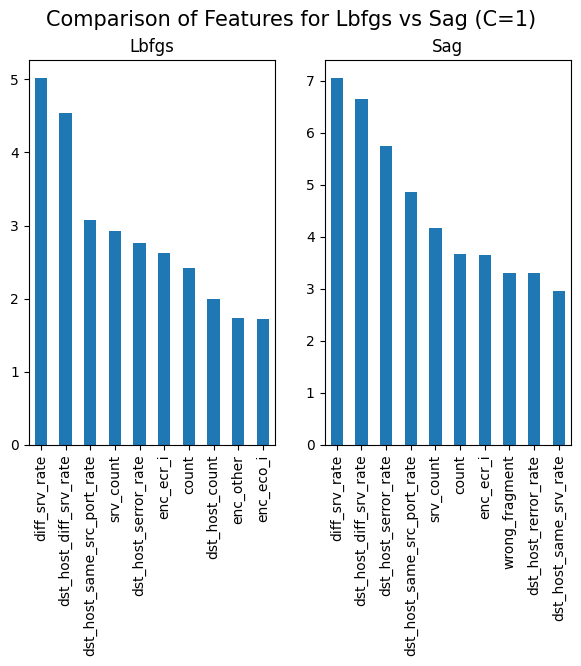

Lbfgs Test Accuracy: 99.952%
Sag Test Accuracy: 99.968%


In [76]:
# compare lbfgs feature weights vs sag with C = 1

fig9, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig9.suptitle('Comparison of Features for Lbfgs vs Sag (C=1)', fontsize=15)

top_coef4.plot(ax=ax1, kind="bar", figsize=(7,5), title="Lbfgs", legend=False)
top_sag4.plot(ax=ax2, kind="bar", figsize=(7,5), title="Sag", legend=False)

plt.show()

print('\033[1m' + "Lbfgs Test Accuracy:" + '\033[0m', str(round(accuracy_score(y_hat4, y_test)*100,3)) + "%")
print('\033[1m' + "Sag Test Accuracy:" + '\033[0m', str(round(accuracy_score(sag4_pred, y_test)*100,3)) + "%")

### Observation

The accuracies of the two models are once again very close. The top features with the highest weights are more or less the same but the order and absolute values of the weights differ. This shows that both models are getting better at identifying which features are most important. This explains the increasing accuracy scores.

In [77]:
# coeff df for C=10
sag5_coef = pd.DataFrame(data=abs(sag5.coef_),columns=feature_names)
sag5_coef = sag5_coef.T
sag5_coef.rename(columns={0:"Features"},inplace=True)
top_sag5 = sag5_coef.sort_values(by="Features",ascending=False).head(10)

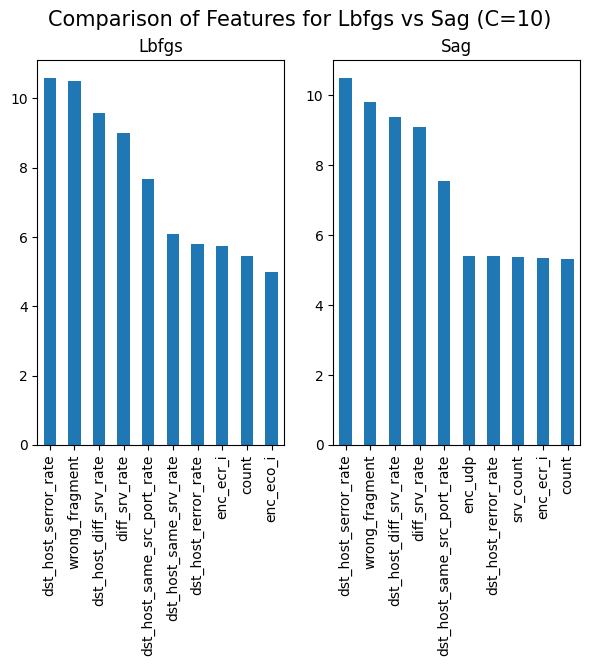

Lbfgs Test Accuracy: 99.992%
Sag Test Accuracy: 99.988%


In [78]:
# compare lbfgs feature weights vs sag with C = 10

fig10, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig10.suptitle('Comparison of Features for Lbfgs vs Sag (C=10)', fontsize=15)

top_coef5.plot(ax=ax1, kind="bar", figsize=(7,5), title="Lbfgs", legend=False)
top_sag5.plot(ax=ax2, kind="bar", figsize=(7,5), title="Sag", legend=False)

plt.show()

print('\033[1m' + "Lbfgs Test Accuracy:" + '\033[0m', str(round(accuracy_score(y_hat5, y_test)*100,3)) + "%")
print('\033[1m' + "Sag Test Accuracy:" + '\033[0m', str(round(accuracy_score(sag5_pred, y_test)*100,3)) + "%")

### Observation

In our final comparison, lbfgs jumps ahead with a slightly higher accuracy score. The top three features are identical, albeit with slightly different weights. The next two are the same features but with the order flipped. Lbfgs has wrong fragment ahead of dst_host_same_src_port_rate which might be the differentiating factor. As I highlighted in a prior observation, wrong fragment seems like a good predictor of the attack type.

## Testing Using Saga

In [80]:
# Similar to liblinear, saga is the only other solver that supports both L1 and L2 penalties
# (C=0.001)

saga1_l1 = LogisticRegression(penalty='l1',C=0.001,random_state=42,solver='saga',max_iter=100)
saga1_l1.fit(X_res, y_res)
saga1_l1_pred = saga1_l1.predict(X_test)

saga1_l2 = LogisticRegression(penalty='l2',C=0.001,random_state=42,solver='saga',max_iter=100)
saga1_l2.fit(X_res, y_res)
saga1_l2_pred = saga1_l2.predict(X_test)

print("L1 Training Accuracy:", saga1_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(saga1_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", saga1_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", saga1_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(saga1_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", saga1_l2.n_iter_[0])

L1 Training Accuracy: 99.13161176506372 %
L1 Testing Accuracy: 99.90192706940252 %
L1 Number of Iterations: 85

L2 Training Accuracy: 97.12717097058734 %
L2 Testing Accuracy: 94.7994599620445 %
L2 Number of Iterations: 15


In [83]:
# (C=0.01)

saga2_l1 = LogisticRegression(penalty='l1',C=0.01,random_state=42,solver='saga',max_iter=1000)
saga2_l1.fit(X_res, y_res)
saga2_l1_pred = saga2_l1.predict(X_test)

saga2_l2 = LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='saga',max_iter=1000)
saga2_l2.fit(X_res, y_res)
saga2_l2_pred = saga2_l2.predict(X_test)

print("L1 Training Accuracy:", saga2_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(saga2_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", saga2_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", saga2_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(saga2_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", saga2_l2.n_iter_[0])

L1 Training Accuracy: 99.85248045746266 %
L1 Testing Accuracy: 99.92077745086802 %
L1 Number of Iterations: 588

L2 Training Accuracy: 99.79925175654712 %
L2 Testing Accuracy: 99.92752792531174 %
L2 Number of Iterations: 79


In [84]:
# (C=0.1)

saga3_l1 = LogisticRegression(penalty='l1',C=0.1,random_state=42,solver='saga',max_iter=3000)
saga3_l1.fit(X_res, y_res)
saga3_l1_pred = saga3_l1.predict(X_test)

saga3_l2 = LogisticRegression(penalty='l2',C=0.1,random_state=42,solver='saga',max_iter=3000)
saga3_l2.fit(X_res, y_res)
saga3_l2_pred = saga3_l2.predict(X_test)

print("L1 Training Accuracy:", saga3_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(saga3_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", saga3_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", saga3_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(saga3_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", saga3_l2.n_iter_[0])

L1 Training Accuracy: 99.9528545791891 %
L1 Testing Accuracy: 99.94650567421955 %
L1 Number of Iterations: 892

L2 Training Accuracy: 99.95741703926757 %
L2 Testing Accuracy: 99.95261931145161 %
L2 Number of Iterations: 284


In [85]:
# (C=1)

saga4_l1 = LogisticRegression(penalty='l1',C=1,random_state=42,solver='saga',max_iter=3000)
saga4_l1.fit(X_res, y_res)
saga4_l1_pred = saga4_l1.predict(X_test)

saga4_l2 = LogisticRegression(penalty='l2',C=1,random_state=42,solver='saga',max_iter=3000)
saga4_l2.fit(X_res, y_res)
saga4_l2_pred = saga4_l2.predict(X_test)

print("L1 Training Accuracy:", saga4_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(saga4_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", saga4_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", saga4_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(saga4_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", saga4_l2.n_iter_[0])

L1 Training Accuracy: 99.98022933965994 %
L1 Testing Accuracy: 99.97376230687911 %
L1 Number of Iterations: 2406

L2 Training Accuracy: 99.97262523952915 %
L2 Testing Accuracy: 99.96764866964708 %
L2 Number of Iterations: 690


In [86]:
# (C=10)

saga5_l1 = LogisticRegression(penalty='l1',C=10,random_state=42,solver='saga',max_iter=5000)
saga5_l1.fit(X_res, y_res)
saga5_l1_pred = saga5_l1.predict(X_test)

saga5_l2 = LogisticRegression(penalty='l2',C=10,random_state=42,solver='saga',max_iter=3000)
saga5_l2.fit(X_res, y_res)
saga5_l2_pred = saga5_l2.predict(X_test)

print("L1 Training Accuracy:", saga5_l1.score(X_res, y_res)*100,"%")
print("L1 Testing Accuracy:", (accuracy_score(saga5_l1_pred, y_test)*100),"%")
print("L1 Number of Iterations:", saga5_l1.n_iter_[0])
print("")
print("L2 Training Accuracy:", saga5_l2.score(X_res, y_res)*100,"%")
print("L2 Testing Accuracy:", (accuracy_score(saga5_l2_pred, y_test)*100),"%")
print("L2 Number of Iterations:", saga5_l2.n_iter_[0])

L1 Training Accuracy: 99.99695835994768 %
L1 Testing Accuracy: 99.99528740463363 %
L1 Number of Iterations: 3124

L2 Training Accuracy: 99.98783343979073 %
L2 Testing Accuracy: 99.98777272553589 %
L2 Number of Iterations: 2070


### Observation

Saga is the only other solver that can support both L1 and L2 penalties. It took longer than all the other solvers to converge, especially for L1 which went from a low of 85 to 3,124 iterations. The L2 convergence was faster starting at 15 on the low end and rising all the way to 2,070 iterations by the time we set C to 10. Interestingly, the L1 implementations had slightly higher accuracy in three of the five experiments. However, the gap was mostly small between the two, except when C was equal to 0.001. There was a very significant gap between the two where L1 was much more accurate.

The model does not overfit as the training and testing accuracy are very close together. In the next section, we will plot the two regularization methods in bar graphs to compare the top features.

In [87]:
# put the features in a df
# C = 0.001

saga1_l1_coef = pd.DataFrame(data=abs(saga1_l1.coef_),columns=feature_names)
saga1_l1_coef = saga1_l1_coef.T
saga1_l1_coef.rename(columns={0:"Features"},inplace=True)
top_saga1_l1 = saga1_l1_coef.sort_values(by="Features",ascending=False).head(10)

saga1_l2_coef = pd.DataFrame(data=abs(saga1_l2.coef_),columns=feature_names)
saga1_l2_coef = saga1_l2_coef.T
saga1_l2_coef.rename(columns={0:"Features"},inplace=True)
top_saga1_l2 = saga1_l2_coef.sort_values(by="Features",ascending=False).head(10)

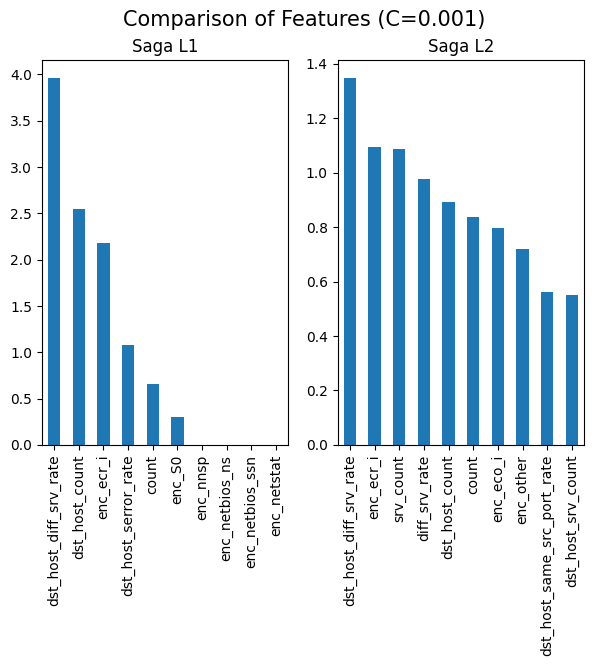

L1 Test Accuracy: 99.902%
L2 Test Accuracy: 94.799%


In [89]:
# compare saga feature weights for L1 vs L2 with C = 0.001

fig11, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig11.suptitle('Comparison of Features (C=0.001)', fontsize =15)


top_saga1_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Saga L1", legend=False)
top_saga1_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Saga L2", legend=False)

plt.show()

print('\033[1m' + "L1 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga1_l1_pred, y_test)*100,3)) + "%")
print('\033[1m' + "L2 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga1_l2_pred, y_test)*100,3)) + "%")

### Observation

As we look at the features on the graphs, we see that after the top feature, L1 and L2 diverge significantly. The remaining four features are very different with the exception of dst_host_count. L1 puts much greater weights on the two features in common and chooses completely different features for other top five. L2 distributes the weights more evenly across 10 features while L1 basically puts zero weight after the first six. The different selection of top features and weights explains the discrepancy between the two accuracies.

In [90]:
# C = 0.01

saga2_l1_coef = pd.DataFrame(data=abs(saga2_l1.coef_),columns=feature_names)
saga2_l1_coef = saga2_l1_coef.T
saga2_l1_coef.rename(columns={0:"Features"},inplace=True)
top_saga2_l1 = saga2_l1_coef.sort_values(by="Features",ascending=False).head(10)

saga2_l2_coef = pd.DataFrame(data=abs(saga2_l2.coef_),columns=feature_names)
saga2_l2_coef = saga2_l2_coef.T
saga2_l2_coef.rename(columns={0:"Features"},inplace=True)
top_saga2_l2 = saga2_l2_coef.sort_values(by="Features",ascending=False).head(10)

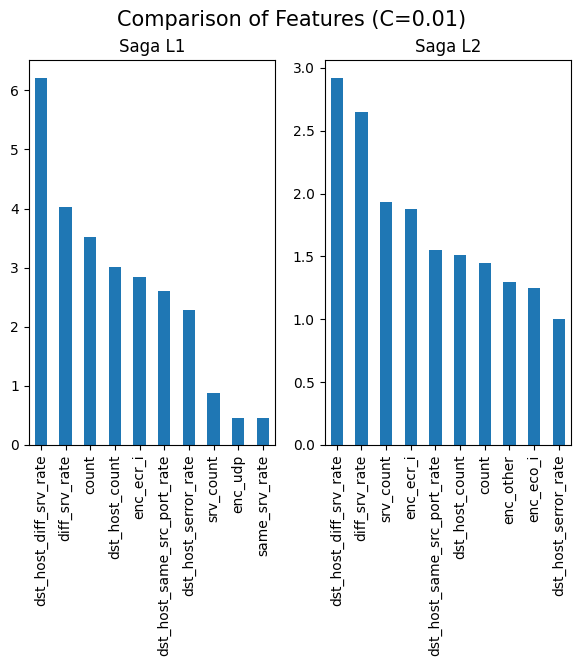

L1 Test Accuracy: 99.921%
L2 Test Accuracy: 99.928%


In [91]:
# compare saga feature weights for L1 vs L2 with C = 0.01

fig12, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig12.suptitle('Comparison of Features (C=0.01)', fontsize =15)


top_saga2_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Saga L1", legend=False)
top_saga2_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Saga L2", legend=False)

plt.show()

print('\033[1m' + "L1 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga2_l1_pred, y_test)*100,3)) + "%")
print('\033[1m' + "L2 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga2_l2_pred, y_test)*100,3)) + "%")

### Observation

In this scenario, the accuracy scores are almost identical between L1 and L2. L2 has a negligibly higher accuracy. This closeness in scores makes sense given the overlap in top features. This time L1 distribute the weights across more features but still concentrated the highest weights in the top feature which is dst_host_diff_srv_rate. The two implementations chose exactly the same top two features which make sense as good predictors of probe or non-probe attacks. As stated previously, probing attacks involve opening many simultaneous connections with the same hosts across many different services.

In [92]:
# C = 0.1

saga3_l1_coef = pd.DataFrame(data=abs(saga3_l1.coef_),columns=feature_names)
saga3_l1_coef = saga3_l1_coef.T
saga3_l1_coef.rename(columns={0:"Features"},inplace=True)
top_saga3_l1 = saga3_l1_coef.sort_values(by="Features",ascending=False).head(10)

saga3_l2_coef = pd.DataFrame(data=abs(saga3_l2.coef_),columns=feature_names)
saga3_l2_coef = saga3_l2_coef.T
saga3_l2_coef.rename(columns={0:"Features"},inplace=True)
top_saga3_l2 = saga3_l2_coef.sort_values(by="Features",ascending=False).head(10)

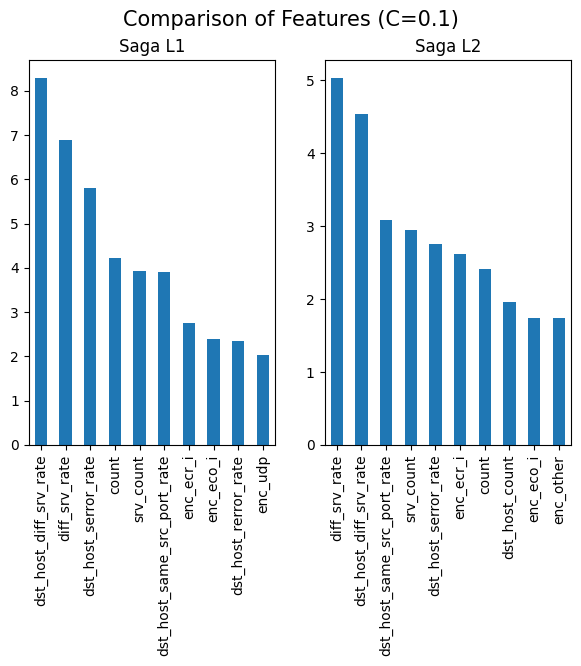

L1 Test Accuracy: 99.947%
L2 Test Accuracy: 99.953%


In [94]:
# compare saga feature weights for L1 vs L2 with C = 0.1

fig13, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig13.suptitle('Comparison of Features (C=0.1)', fontsize =15)


top_saga3_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Saga L1", legend=False)
top_saga3_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Saga L2", legend=False)

plt.show()

print('\033[1m' + "L1 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga3_l1_pred, y_test)*100,3)) + "%")
print('\033[1m' + "L2 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga3_l2_pred, y_test)*100,3)) + "%")

### Observation

With the regularization strength set to 0.1, the L2 accuracy was slightly higher than L1. Once again, we see the two models choose very similar top features. The absolute weights also appear to be closer in value. In this case, it appears that higher accuracy for L2 is attributed to the distribution of the weights while the chosen features are fairly similar. This shows that even if a model chooses the correct predictors, the weights that it assigns to them can alter the accuracy significantly.

In [93]:
# C = 1

saga4_l1_coef = pd.DataFrame(data=abs(saga4_l1.coef_),columns=feature_names)
saga4_l1_coef = saga4_l1_coef.T
saga4_l1_coef.rename(columns={0:"Features"},inplace=True)
top_saga4_l1 = saga4_l1_coef.sort_values(by="Features",ascending=False).head(10)

saga4_l2_coef = pd.DataFrame(data=abs(saga4_l2.coef_),columns=feature_names)
saga4_l2_coef = saga4_l2_coef.T
saga4_l2_coef.rename(columns={0:"Features"},inplace=True)
top_saga4_l2 = saga4_l2_coef.sort_values(by="Features",ascending=False).head(10)

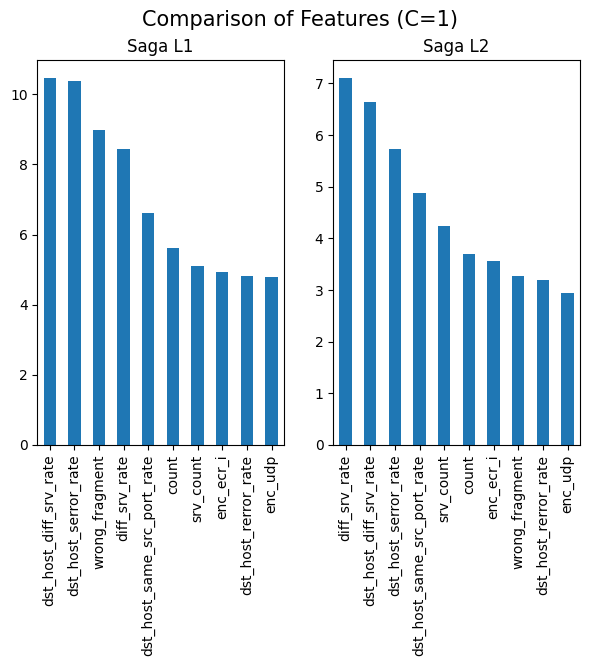

L1 Test Accuracy: 99.974%
L2 Test Accuracy: 99.968%


In [95]:
# compare saga feature weights for L1 vs L2 with C = 1

fig14, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig14.suptitle('Comparison of Features (C=1)', fontsize =15)


top_saga4_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Saga L1", legend=False)
top_saga4_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Saga L2", legend=False)

plt.show()

print('\033[1m' + "L1 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga4_l1_pred, y_test)*100,3)) + "%")
print('\033[1m' + "L2 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga4_l2_pred, y_test)*100,3)) + "%")

### Observation

L1 has a slightly higher accuracy in this experiment. The order and weights of the top features makes the difference here. The dst_host_serror_rate continues to be an important predictor. SYN errors are a very common and expected result of a probing attack.

In [96]:
# C = 10

saga5_l1_coef = pd.DataFrame(data=abs(saga5_l1.coef_),columns=feature_names)
saga5_l1_coef = saga5_l1_coef.T
saga5_l1_coef.rename(columns={0:"Features"},inplace=True)
top_saga5_l1 = saga5_l1_coef.sort_values(by="Features",ascending=False).head(10)

saga5_l2_coef = pd.DataFrame(data=abs(saga5_l2.coef_),columns=feature_names)
saga5_l2_coef = saga5_l2_coef.T
saga5_l2_coef.rename(columns={0:"Features"},inplace=True)
top_saga5_l2 = saga5_l2_coef.sort_values(by="Features",ascending=False).head(10)

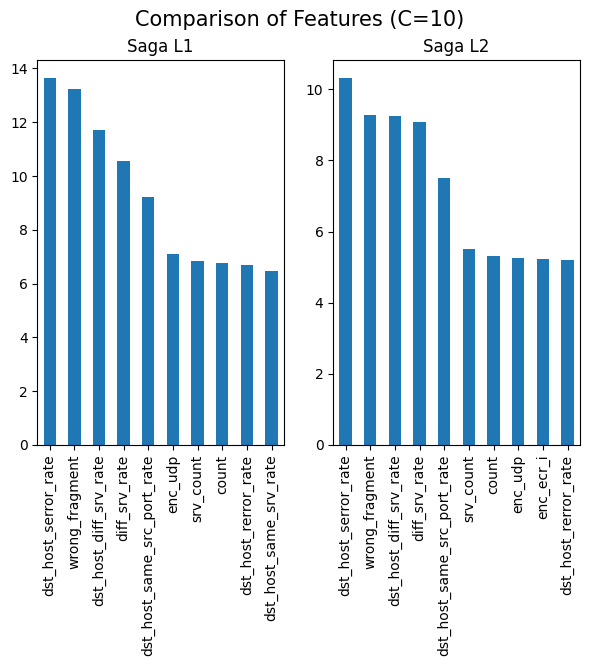

L1 Test Accuracy: 99.995%
L2 Test Accuracy: 99.988%


In [97]:
# compare saga feature weights for L1 vs L2 with C = 10

fig15, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig15.suptitle('Comparison of Features (C=10)', fontsize =15)


top_saga5_l1.plot(ax=ax1, kind="bar", figsize=(7,5), title="Saga L1", legend=False)
top_saga5_l2.plot(ax=ax2, kind="bar", figsize=(7,5), title="Saga L2", legend=False)

plt.show()

print('\033[1m' + "L1 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga5_l1_pred, y_test)*100,3)) + "%")
print('\033[1m' + "L2 Test Accuracy:" + '\033[0m', str(round(accuracy_score(saga5_l2_pred, y_test)*100,3)) + "%")

### Observation

As we raised the regularization to 10, we see that L1 is more accurace now. In fact, it produced one of the highest testing accuracy scores across all the models we have looked at. Astoundingly, the order of the top five features is exactly the same. They start to diverge by the time we get to the sixth feature. Furthermore, L1 assigns slightly higher weights to the top predictors which explains the higher accuracy. As we saw previously, the highest accuracy tends to occur when we raise the regularization to the top value used in this analysis (10).

# Summary

In this analysis, we looked at an old dataset developed by the United States Military. It contains both normal and abnormal traffic associated with probing and non-probing attacks. After filtering out normal traffic, we were able to create a binary classifier that either assigns 1 if it is a probing attack and 0 if it is non-probing. Throughout this exercise, we applied numerous data cleaning and preproprocessing techniques:

- We one hot encoded the categorical columns;
- We used a MinMaxScaler to standardize the features with very large variances;
- We split the dataset into training and testing data using an 80/20 proportion; and
- We used a random undersampler on the training dataset to balance the data points across different features.

The process that we chose for this analysis is meant to mimic real world problems. Usually, the testing data is not balanced nor structered as nicely as the one used here. As such, we only undersampled the training dataset to simulate a real-world problem.

After preparing the data for analysis, we applied five different solvers: lbfgs, cg-newton, liblinear, sag, and saga. Most of these solvers only support L2 regularization except liblinear and saga which also support L1. To test the effect of different regularization strengths, we set the C value to 0.001, 0.01, 0.1, 1, and 10. This was uniformly applied to all five solvers.

As the dataset is extremely clean, there was no overfitting. Moreover, the accuracy was in the high 90s in almost all cases. L1 is better suited for datasets with more features but L2 also did a great job at classifying the data. The L1 regularization produced a slightly higher accuracy score than L2 in most cases. Some solvers converged very quickly while others such as saga took about 10 minutes and thousands of iterations to complete. 

One notable observation is that the models tended to cluster around the best predicting features and assigned higher weights to them accordingly as the accuracy improved. This makes sense as the models start to learn patterns from the training data and apply them to the test data. Generally, as the regularization strength increased so did the overall testing accuracy of the models.